# Telecom Data Churn Analysis

   In this project, the goal is to identify churn customers, that is, customers most likely to cancel subscription to a fictitious telecom company. Customer churn is a really interesting problem, because once identified, it is possible to focus on retention actions, providing adequate intervention to encourage them to stay and minimize customer exit. The dataset for this project was obtained from the [OpenML](https://www.openml.org/d/40701) public repository. The dataset relating features of account and usage for churn and non churn clients. In the context of this project, this is a problem of supervised classification and Machine Learning algorithms will be used for the development of predictive models and evaluation of accuracy and performance. It seeks to find the most appropriate model for the business.

# 1. Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline

### 1.1 Load Data

In [2]:
# load csv
customers = pd.read_csv('churn.csv')

# Convert categorical variable into dummy/indicator variables
customers = pd.get_dummies(customers)

In [3]:
# features 
features = customers[customers.columns.difference(['area_code','phone_number', 'class'])]

# target
targets = customers[['class']]

### 1.2 Univariate Analysis

In [4]:
# describe the characteristics of variables
features.describe()

account_length  international_plan  number_customer_service_calls  \
count      5000.00000         5000.000000                    5000.000000   
mean        100.25860            0.094600                       1.570400   
std          39.69456            0.292691                       1.306363   
min           1.00000            0.000000                       0.000000   
25%          73.00000            0.000000                       1.000000   
50%         100.00000            0.000000                       1.000000   
75%         127.00000            0.000000                       2.000000   
max         243.00000            1.000000                       9.000000   

       number_vmail_messages       state  total_day_calls  total_day_charge  \
count            5000.000000  5000.00000      5000.000000       5000.000000   
mean                7.755200    25.99840       100.029400         30.649668   
std                13.546393    14.80348        19.831197          9.162069   
min                 0.000000     0.00000         0.000000          0.000000   
25%                 0.000000    13.00000        87.000000         24.430000   
50%                 0.000000    26.00000       100.000000         30.620000   
75%                17.000000    39.00000       113.000000         36.750000   
max                52.000000    50.00000       165.000000         59.760000   

       total_day_minutes  total_eve_calls  total_eve_charge  \
count        5000.000000      5000.000000       5000.000000   
mean          180.288900       100.191000         17.054322   
std            53.894699        19.826496          4.296843   
min             0.000000         0.000000          0.000000   
25%           143.700000        87.000000         14.140000   
50%           180.100000       100.000000         17.090000   
75%           216.200000       114.000000         19.900000   
max           351.500000       170.000000         30.910000   

       total_eve_minutes  total_intl_calls  total_intl_charge  \
count        5000.000000       5000.000000        5000.000000   
mean          200.636560          4.435200           2.771196   
std            50.551309          2.456788           0.745514   
min             0.000000          0.000000           0.000000   
25%           166.375000          3.000000           2.300000   
50%           201.000000          4.000000           2.780000   
75%           234.100000          6.000000           3.240000   
max           363.700000         20.000000           5.400000   

       total_intl_minutes  total_night_calls  total_night_charge  \
count         5000.000000        5000.000000         5000.000000   
mean            10.261780          99.919200            9.017732   
std              2.761396          19.958686            2.273763   
min              0.000000           0.000000            0.000000   
25%              8.500000          87.000000            7.510000   
50%             10.300000         100.000000            9.020000   
75%             12.000000         113.000000           10.560000   
max             20.000000         175.000000           17.770000   

       total_night_minutes  voice_mail_plan  
count          5000.000000      5000.000000  
mean            200.391620         0.264600  
std              50.527789         0.441164  
min               0.000000         0.000000  
25%             166.900000         0.000000  
50%             200.400000         0.000000  
75%             234.700000         1.000000  
max             395.000000         1.000000

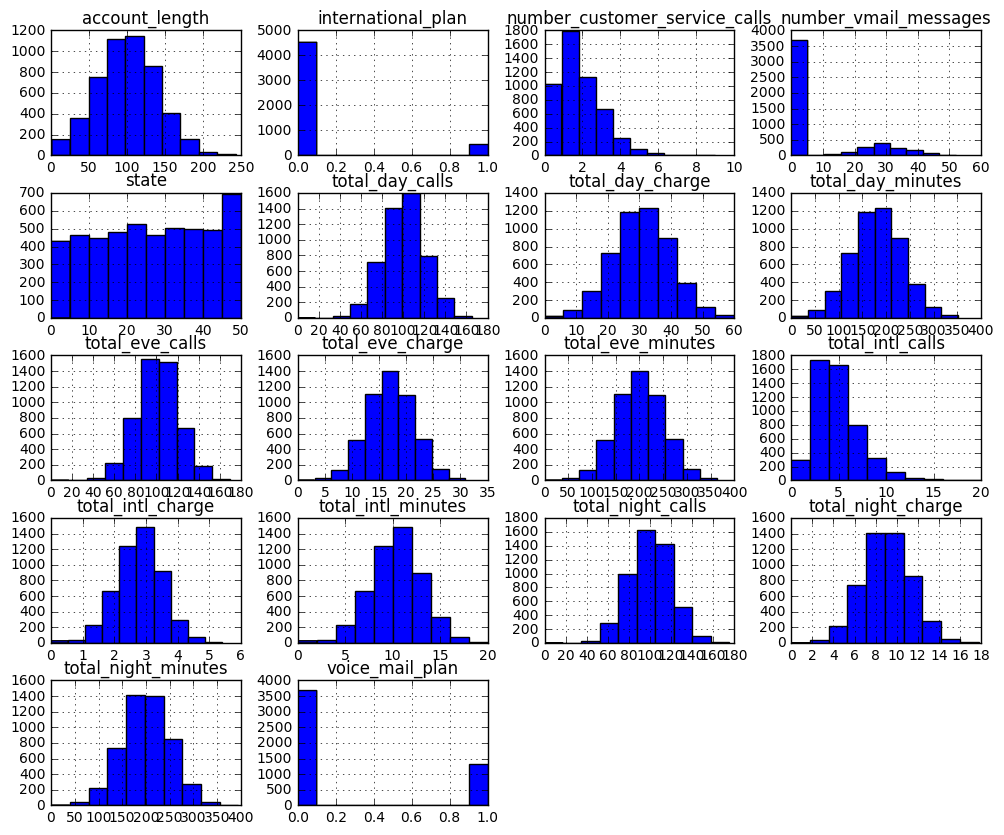

In [5]:
features.hist(figsize=(12,10))
plt.show()

### 1.3 Correlation matrix

A correlation matrix describing the correlation between the different features in the dataset.

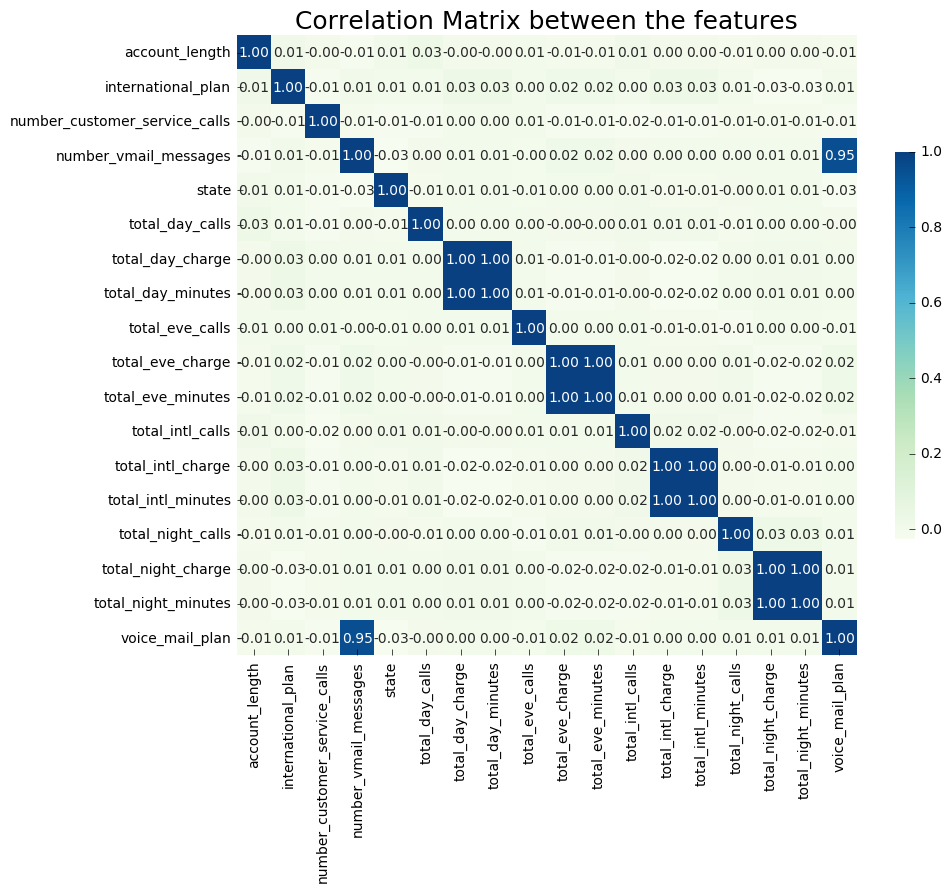

In [6]:
correlation_matrix = features.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation Matrix between the features', fontsize=18)
plt.show()

### 1.4 Pairwise relationships between the features

Grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

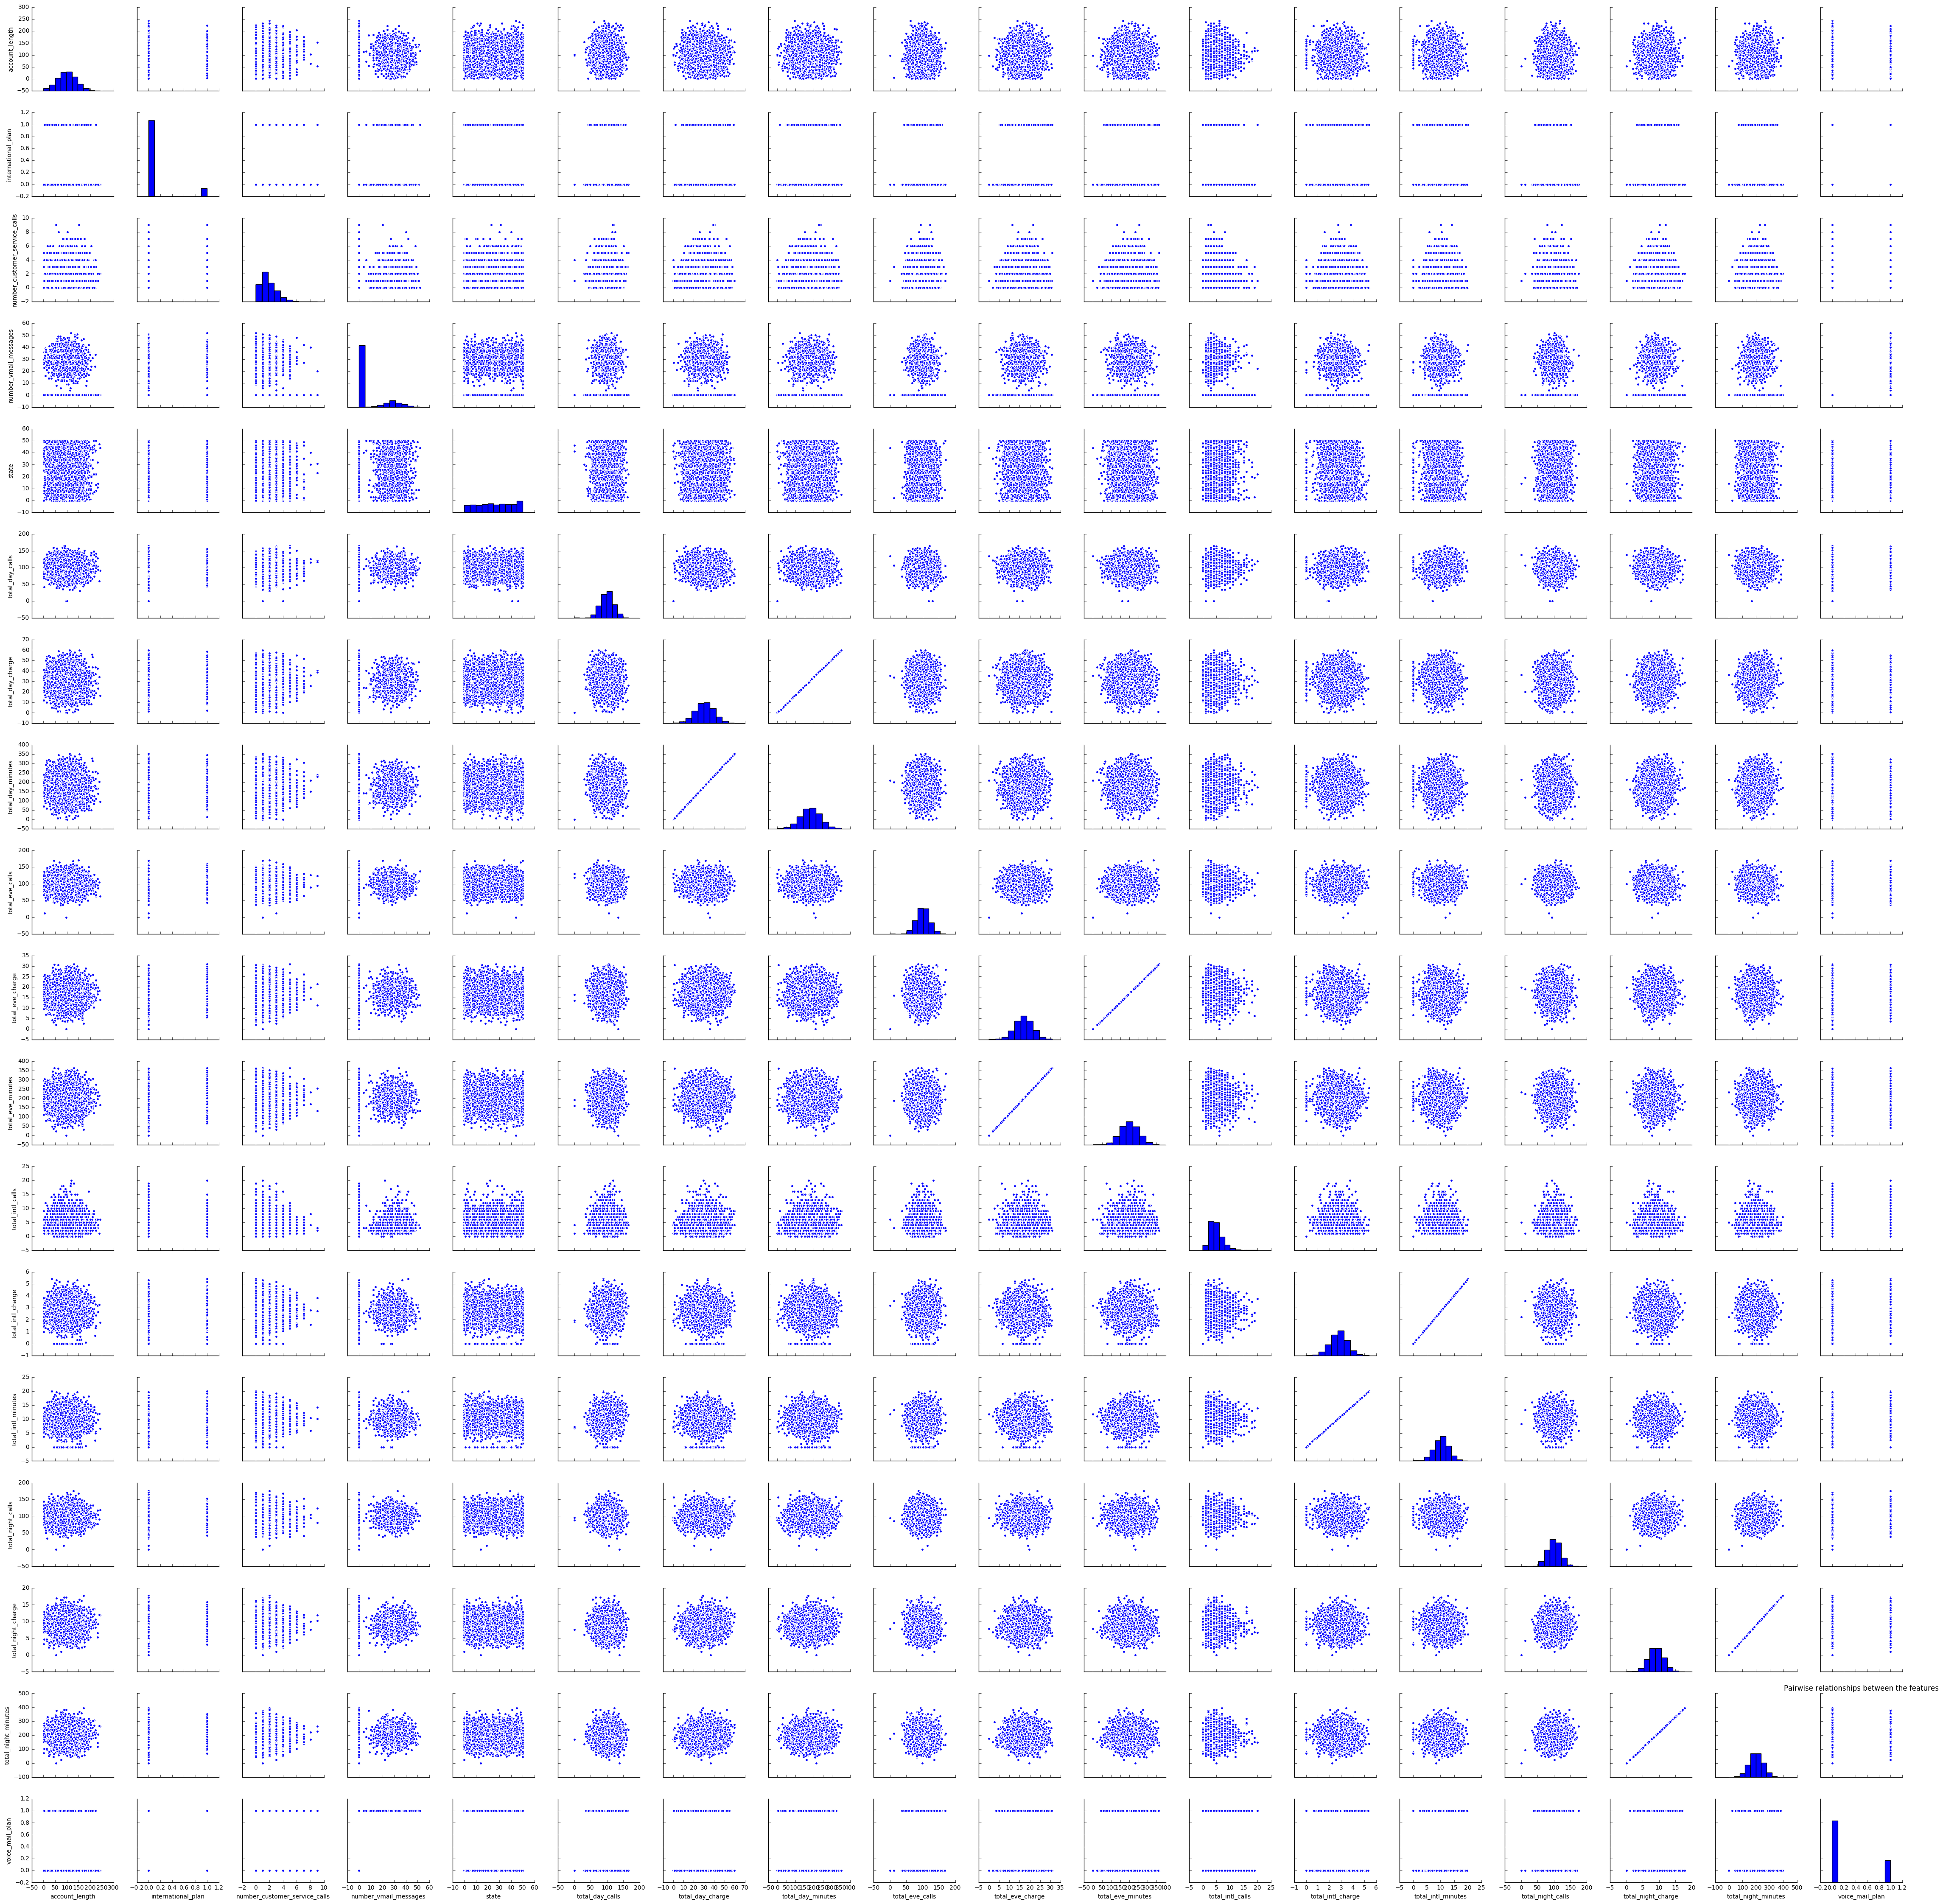

In [7]:
ax = sns.pairplot(features)
plt.title('Pairwise relationships between the features')
plt.show()

### 1.5 Feature Importance

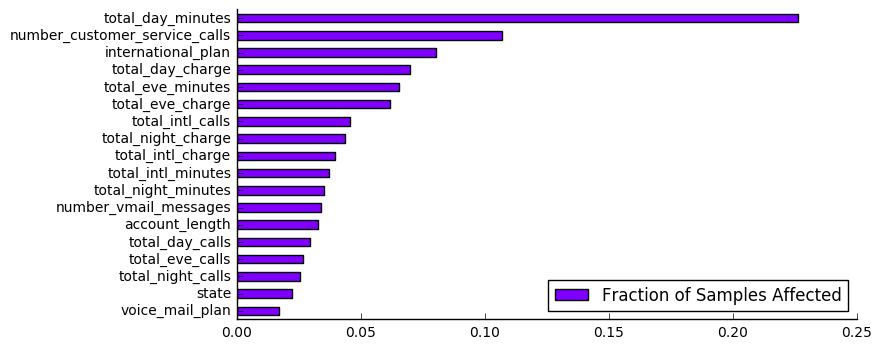

In [8]:
# Split dataset into random train and test subsets - random_state is the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=150)

rf = RandomForestClassifier() 
## Fit the model on your training data
rf.fit(X_train, y_train.values.ravel())
## And score it on your testing data
rf.score(X_test, y_test)
importance = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},index=features.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(8,4), colormap='rainbow')
sns.despine()

# 2. Models Analysis

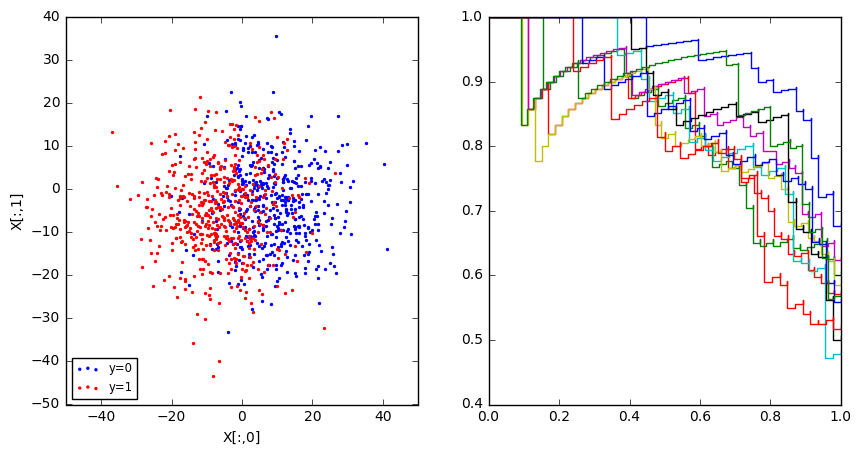

In [18]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold
from sklearn.svm import SVC

FOLDS = 10
X=features
y=targets

X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=10.0,
    random_state=12345)

f, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(X[y==0,0], X[y==0,1], color='blue', s=2, label='y=0')
axes[0].scatter(X[y!=0,0], X[y!=0,1], color='red', s=2, label='y=1')
axes[0].set_xlabel('X[:,0]')
axes[0].set_ylabel('X[:,1]')
axes[0].legend(loc='lower left', fontsize='small')

k_fold = KFold(n_splits=FOLDS, shuffle=True, random_state=12345)
predictor = SVC(kernel='linear', C=1.0, probability=True, random_state=12345)

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[1].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])


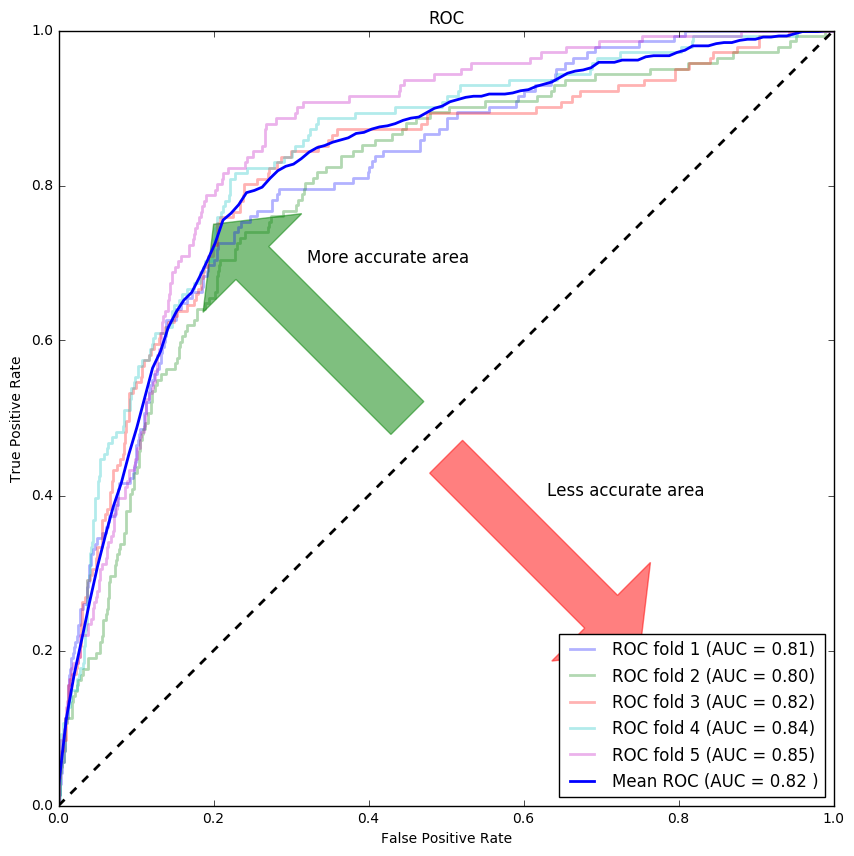

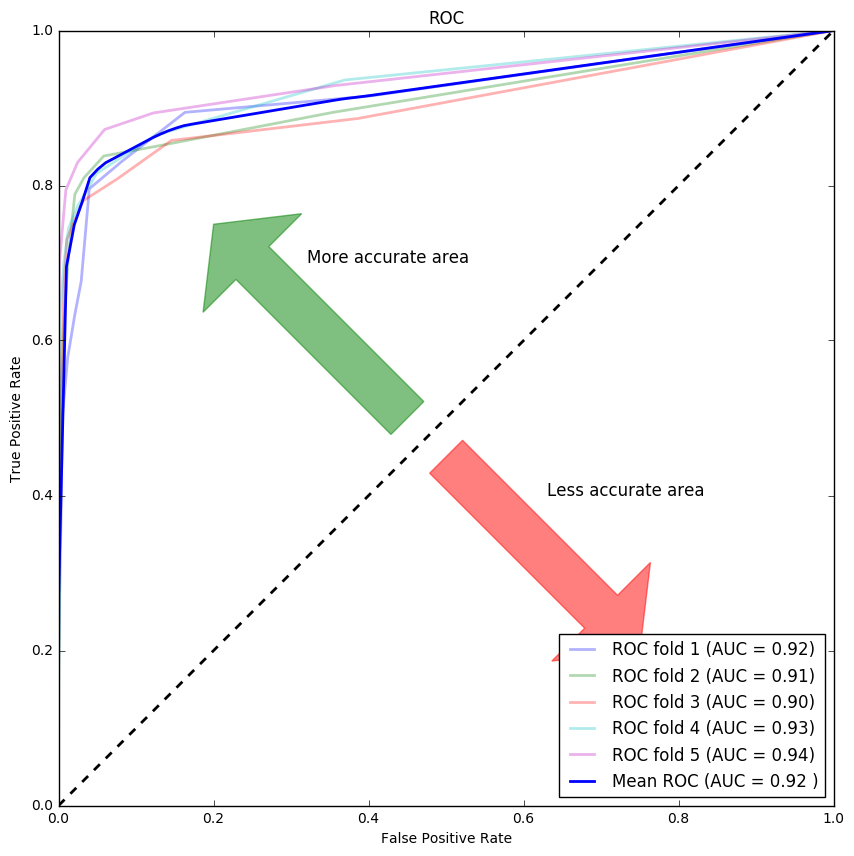

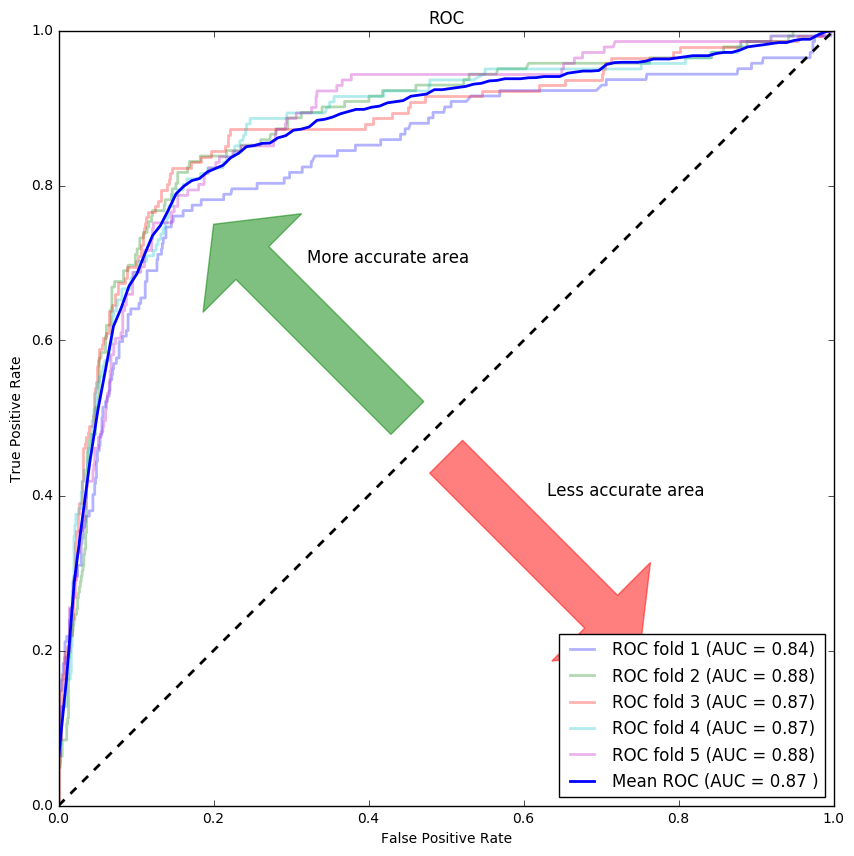

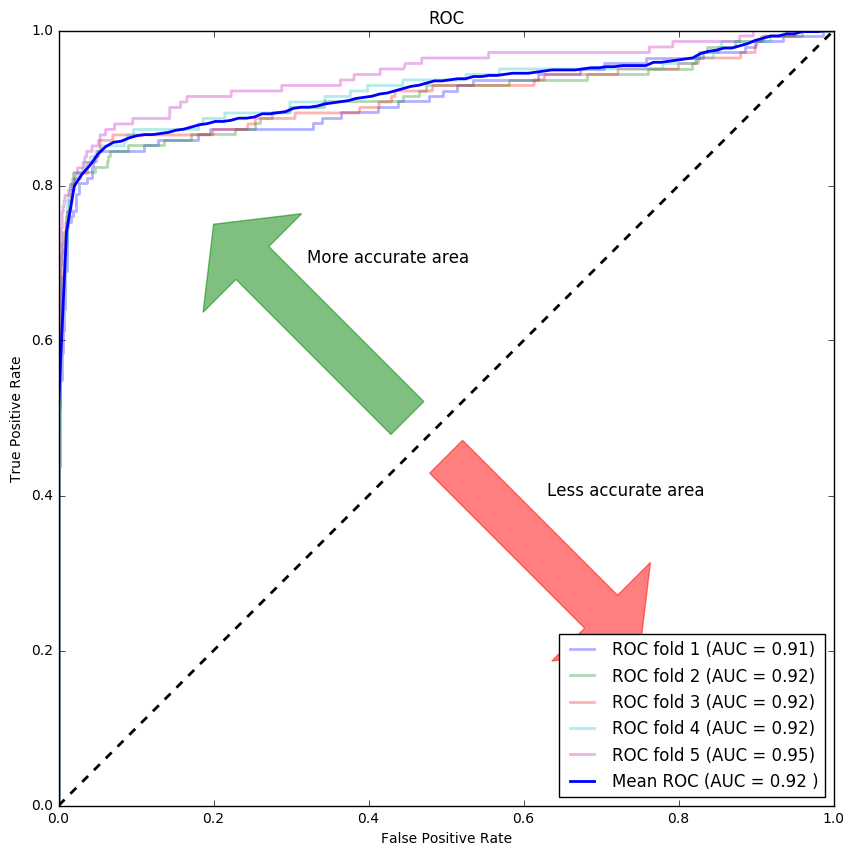

[0.82368536024514449, 0.91954030082372251, 0.86758898850688781, 0.92219533260887776]


In [79]:
cv = StratifiedKFold(n_splits=5,shuffle=False)

# classifiers to be built
classifiers = [LogisticRegression(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

v_mean_auc=[]
for u,c in enumerate(classifiers):

    # plot arrows
    fig1 = plt.figure(figsize=[10,10])
    ax1 = fig1.add_subplot(111,aspect = 'equal')
    ax1.add_patch(
        patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
        )
    ax1.add_patch(
        patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
        )
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train,test in cv.split(features,targets.values.ravel()):
        prediction = c.fit(features.iloc[train],targets.iloc[train].values.ravel()).predict_proba(features.iloc[test])
        fpr, tpr, t = roc_curve(targets.values.ravel()[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1
    
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
    v_mean_auc.append(mean_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    plt.show()
print(v_mean_auc)

overfiting

Scorar e Segmentar clientes com maior propensao a churn

deploy